In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os #handle desktop
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense , MaxPooling2D

**Load The Mnist dataset**


In [5]:
(x_train, y_train), (x_test,y_test) = mnist.load_data() #the dataset is load here

# Display the Shape of the Dataset
print(f"Shape of the X Train is : {x_train.shape}")
print(f"Shape of the Y Train is : {y_train.shape}")
print(f"Shape of the X Test  is : {x_test.shape}")
print(f"Shape of the Y Test  is : {y_test.shape}")

11490434/11490434 [==============================] - 0s 0us/step
Shape of the X Train is : (60000, 28, 28)
Shape of the Y Train is : (60000,)
Shape of the X Test  is : (10000, 28, 28)
Shape of the Y Test  is : (10000,)


**Visualization MNIST Dataset**

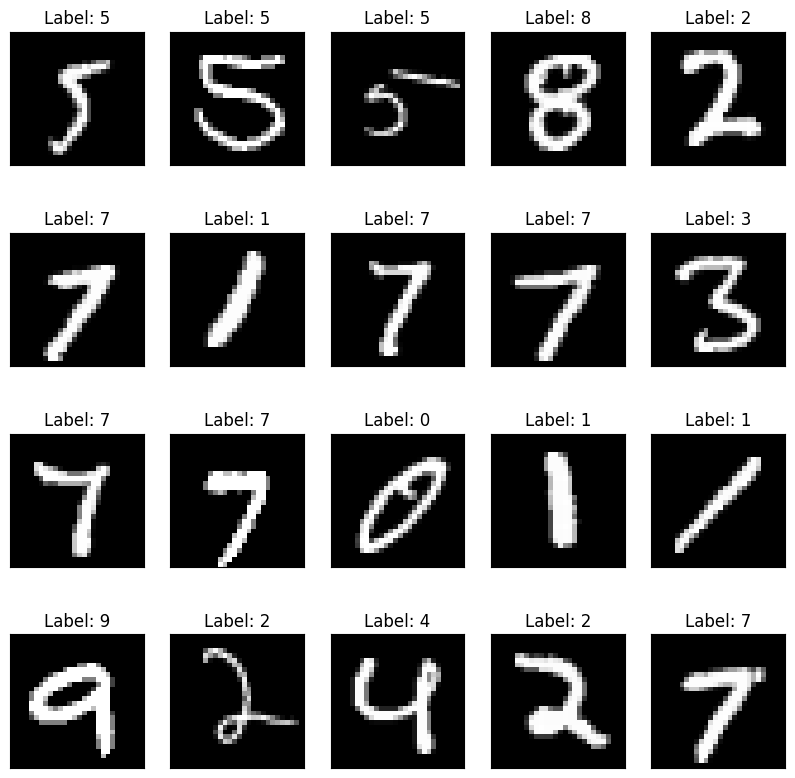

In [11]:
#set the figure 
plt.figure(figsize= (10,10))

#display the 20 images with the help of "randomly"

for index in range(20):
  plt.subplot(4,5,index + 1)                 #4 rows and 5 columns 
  img_no=random.randint(0,60000)             #randomly pick images
  plt.imshow(x_train[img_no], cmap="gray")
  plt.xticks([])                            #to remove the number or line on scale            
  plt.yticks([])                            #to remove the number or line on scale
  plt.title(f"Label: {y_train[img_no]}")
plt.show()

**Pre-processing images**

In [12]:
#change the type of the images (converting into floating point)
x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)

#convert the label into "one hot encoder". applying on them only because the have the labels only
y_train = to_categorical(y_train , num_classes=10)
y_test = to_categorical(y_test , num_classes=10)

#Normalize the data. applying on them only because the have the images 
x_train /= 255
x_test /= 255

In [13]:
#Display the shape of the training and testing data

print(f"Shape of the X Train is : {x_train.shape}")
print(f"Shape of the Y Train is : {y_train.shape}")
print(f"Shape of the X Test  is : {x_test.shape}")
print(f"Shape of the Y Test  is : {y_test.shape}")

Shape of the X Train is : (60000, 28, 28)
Shape of the Y Train is : (60000, 10)
Shape of the X Test  is : (10000, 28, 28)
Shape of the Y Test  is : (10000, 10)


**CNN Models**

In [16]:
#create the CNN model for the MNIST dataset 

model = Sequential()
#model.add(Conv2D(32, 3, 3), activation='relu', input_shape=(28, 28,1))
model.add(Conv2D(32, (3, 3), activation='relu' , input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())

#Fully connected Layer
model.add(Dense(100, activation='relu'))

#output Layer 
model.add(Dense(10, activation='softmax'))

#Compile the model
#when not binary class then we use categorical_crossentropy (for multiclass)

#when binary class then we use binary_crossentropy

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #for the back propagation

#Display the summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

**Train the CNN Model in (Training Dataset)**

In [18]:
history = model.fit(x_train, y_train, epochs=5 , batch_size= 64)

Epoch 1/5
938/938 [==============================] - 34s 35ms/step - loss: 0.1868 - accuracy: 0.9456
Epoch 2/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0613 - accuracy: 0.9816
Epoch 3/5
938/938 [==============================] - 35s 37ms/step - loss: 0.0416 - accuracy: 0.9874
Epoch 4/5
938/938 [==============================] - 36s 38ms/step - loss: 0.0307 - accuracy: 0.9903
Epoch 5/5
938/938 [==============================] - 32s 35ms/step - loss: 0.0217 - accuracy: 0.9935


In [19]:
#Evaluate the model in the training dataset 
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.0138 - accuracy: 0.9959


[0.01375697460025549, 0.9958666563034058]

**Predict the result in the testing dataset**

In [21]:
#define the list for the y prediction 

y_pred = []
y_true = []

#Load the one by one images

for index in range (0, len(x_test)):
  prediction = model.predict(np.expand_dims(x_test[index], axis=0))
  y_pred.append(np.argmax(prediction)) #it will give the index of the predicted value from rows and columns
  y_true.append(np.argmax(y_test[index]))   #it will give you the max number. means where the value is 1 from all the columns(0 to 9).

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 38ms/step


**Visualization Predicted Dataset**

<Figure size 1500x1000 with 0 Axes>

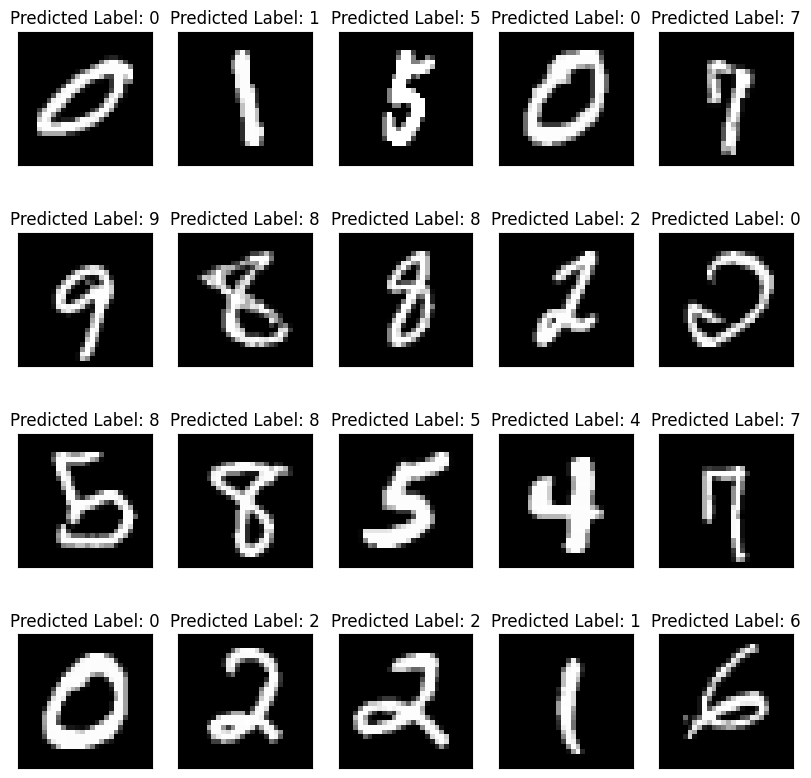

In [23]:
#set the figure

plt.figure(figsize= (15,10))

#Display the 20 images Randomly
#set the figure 
plt.figure(figsize= (10,10))

#display the 20 images with the help of "randomly"

for index in range(20):
  plt.subplot(4,5,index + 1)                 #4 rows and 5 columns 
  img_no=random.randint(0,len(x_test))             #randomly pick images
  plt.imshow(x_test[img_no], cmap="gray")
  plt.xticks([])                            #to remove the number or line on scale            
  plt.yticks([])                            #to remove the number or line on scale
  plt.title(f"Predicted Label: {y_pred[img_no]}")
plt.show()